In [8]:
from tensorflow import keras
from keras.datasets import imdb # text data transformed to integer

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)

# check their dimension
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [9]:
# what does the data look like..
train_input[0]

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [10]:
# our goal is to classify each review to either negative (0) or positive (1) one
train_target[:5]

array([1, 0, 0, 1, 0])

In [11]:
# spare validation set from the train data
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, 
                                                                    test_size=0.3, random_state=42)
# check their dimension
print(train_input.shape, val_input.shape)

(17500,) (7500,)


In [14]:
# average and median of the length of reviews
import numpy as np
rev_len = np.array([len(i) for i in train_input])
print(np.round(np.mean(rev_len),3), np.median(rev_len))

239.216 178.0


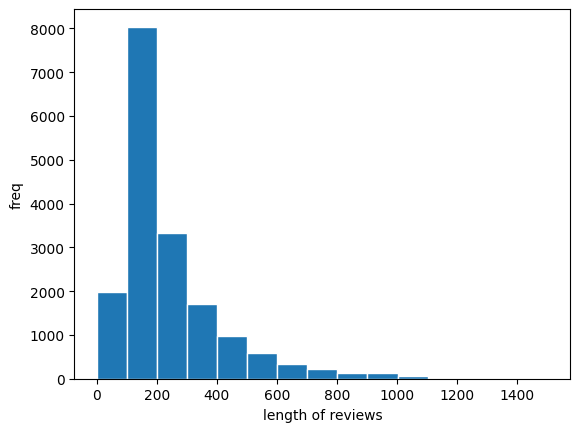

In [20]:
import matplotlib.pyplot as plt
plt.hist(rev_len, edgecolor='white', bins=range(1,1600,100))
plt.xlabel('length of reviews')
plt.ylabel('freq')
plt.show()

In [50]:
# To use 200 words, reviews shorter than that need padding; this can be done by pad_sequences
# then empty space is filled with zero
from keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=150, truncating='post') # selection either 'pre' or 'post'
train_seq.shape

(17500, 150)

In [51]:
# do the same to val_input
val_seq = pad_sequences(val_input, maxlen=150, truncating='post') # selection either 'pre' or 'post'
val_seq.shape

(7500, 150)

# RNN

In [69]:
# create a RNN model
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(10, input_shape=(150,300))) # 150 : time step, 300 : # of unique words
model.add(keras.layers.Dense(1, activation='sigmoid')) # sigmoid for binary classification

# here the integer values need one-hot encoding
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(17500, 150, 300)

In [70]:
# do the same to val_seq
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(7500, 150, 300)

In [71]:
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', 'precision'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_rnn_imdb.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
fit = model.fit(train_oh, train_target, epochs=100, batch_size=50,
                   validation_data=(val_oh, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb], verbose=1)

Epoch 1/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5008 - loss: 0.7067 - precision: 0.5002 - val_accuracy: 0.5141 - val_loss: 0.7006 - val_precision: 0.5188
Epoch 2/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5156 - loss: 0.6969 - precision: 0.5188 - val_accuracy: 0.5444 - val_loss: 0.6891 - val_precision: 0.5647
Epoch 3/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5545 - loss: 0.6858 - precision: 0.5553 - val_accuracy: 0.5849 - val_loss: 0.6763 - val_precision: 0.5829
Epoch 4/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5996 - loss: 0.6704 - precision: 0.5995 - val_accuracy: 0.6292 - val_loss: 0.6587 - val_precision: 0.6367
Epoch 5/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6313 - loss: 0.6550 - precision: 0.6280 - val_accuracy: 0.6529 - val_loss: 0.6433 - val_precision: 0.6533
Epoch 6/100
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6683 - loss: 0.6344 - precision: 0.6595 - val_accuracy: 0.6653 - va

In [37]:
fit.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])

In [47]:
len(fit.history['loss'])

9

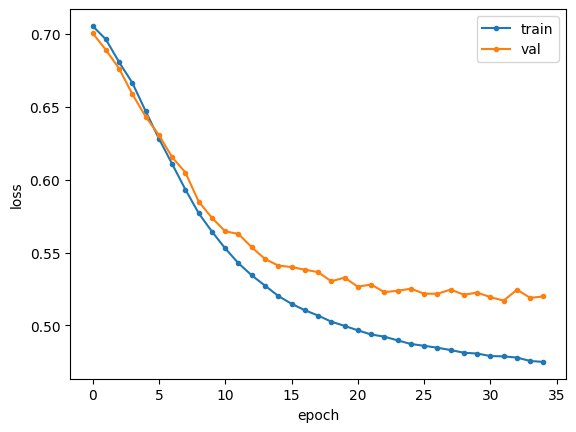

In [72]:
plt.plot(range(len(fit.history['loss'])), fit.history['loss'],'.-')
plt.plot(range(len(fit.history['val_loss'])), fit.history['val_loss'],'.-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [114]:
# what if adding another layers? - make it as functions
def imdb_model(layer):
    model = keras.Sequential()
    if len(layer)==1: # as for a single input
        model.add(layer[0])
    else: # as for an array input
        for i in layer:
            model.add(i)
    # model.add(keras.layers.SimpleRNN(10, input_shape=(150,300))) # 150 : time step, 300 : # of unique words
    model.add(keras.layers.Dense(1, activation='sigmoid')) # sigmoid for binary classification
    return model

def imdb_test(model):
    adam = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy', 'precision'])
    checkpoint_cb = keras.callbacks.ModelCheckpoint('best_rnn_imdb.keras', save_best_only=True)
    early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    fit = model.fit(train_oh, train_target, epochs=100, batch_size=50,
                       validation_data=(val_oh, val_target),
                       callbacks=[checkpoint_cb, early_stopping_cb], verbose=0)

    print(fit.history['loss'][-1], fit.history['val_loss'][-1] )
    plt.plot(range(len(fit.history['loss'])), fit.history['loss'],'.-')
    plt.plot(range(len(fit.history['val_loss'])), fit.history['val_loss'],'.-')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','val'])
    plt.show()

0.48952198028564453 0.5322796106338501


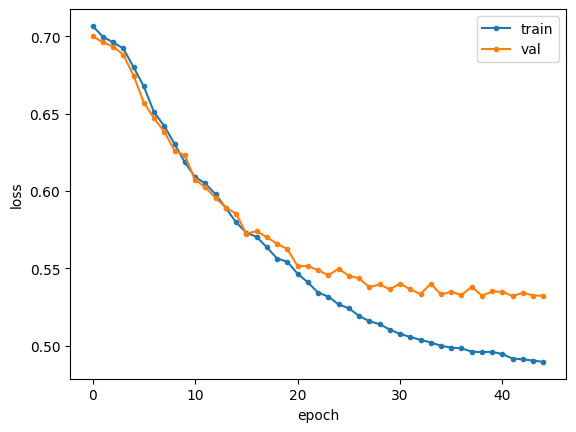

In [124]:
model = imdb_model([keras.layers.SimpleRNN(10, input_shape=(150,300))])
imdb_test(model)

In [125]:
model.summary()

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_30 (SimpleRNN)            │ (None, 10)                  │           3,110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,365 (36.59 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,244 (24.39 KB)

0.5466446876525879 0.5278965830802917


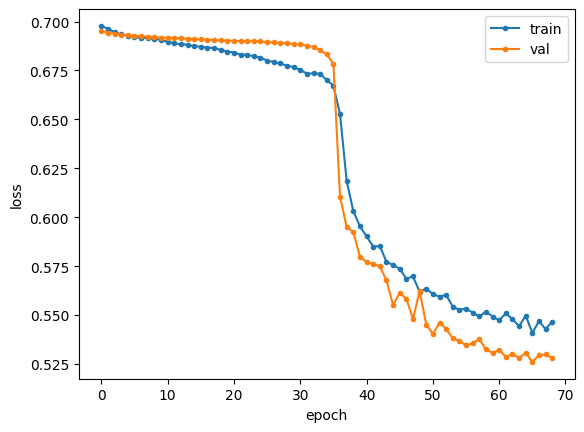

In [126]:
# use dropout
model = imdb_model([keras.layers.SimpleRNN(10, input_shape=(150,300), dropout=0.3)])
imdb_test(model)

0.476459264755249 0.49884769320487976


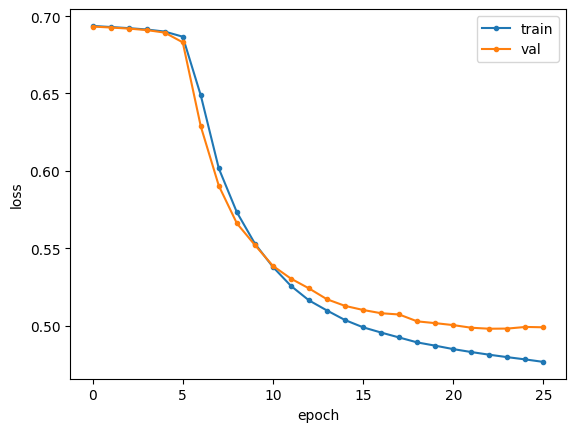

In [119]:
# try LSTM
model = imdb_model([keras.layers.LSTM(10, input_shape=(150,300))])
imdb_test(model)

0.5317063927650452 0.5111872553825378


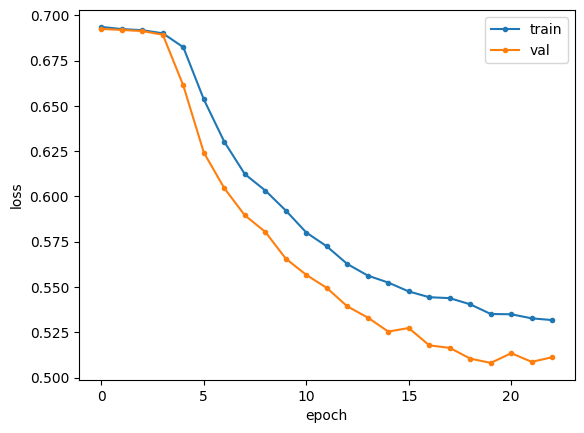

In [120]:
# use dropout to reduce the overffiting further
model = imdb_model([keras.layers.LSTM(10, input_shape=(150,300), dropout=0.3)])
imdb_test(model)

0.5503273010253906 0.5152484774589539


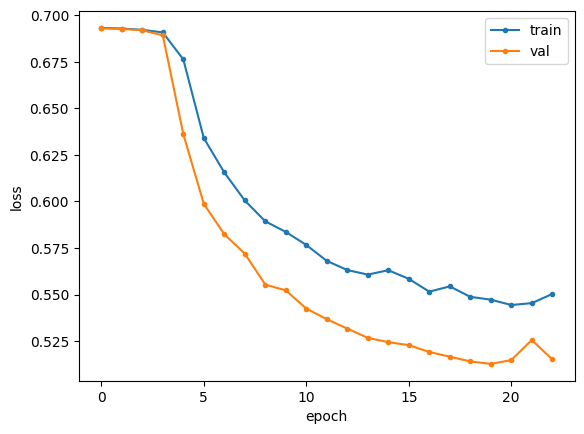

In [122]:
# add one more LSTM layer
model = imdb_model([keras.layers.LSTM(10, input_shape=(150,300), dropout=0.3, return_sequences=True),
                   keras.layers.LSTM(10, dropout=0.3)])
imdb_test(model)

0.48532187938690186 0.5065166354179382


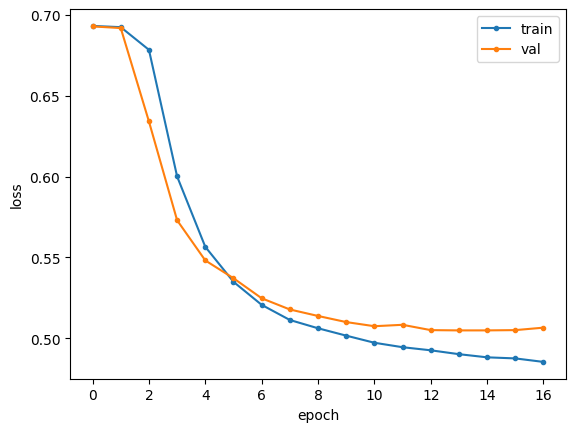

In [123]:
model = imdb_model([keras.layers.LSTM(10, input_shape=(150,300), return_sequences=True),
                   keras.layers.LSTM(10)])
imdb_test(model)

0.4717559218406677 0.49701935052871704


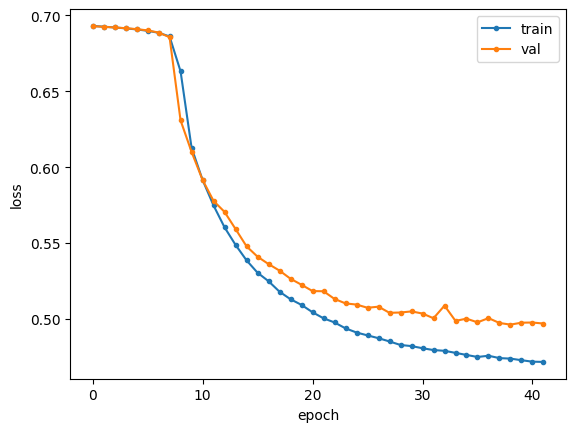

In [133]:
# try GRU in the same way
model = imdb_model([keras.layers.GRU(10, input_shape=(150,300))])
imdb_test(model)

0.4885498285293579 0.5098557472229004


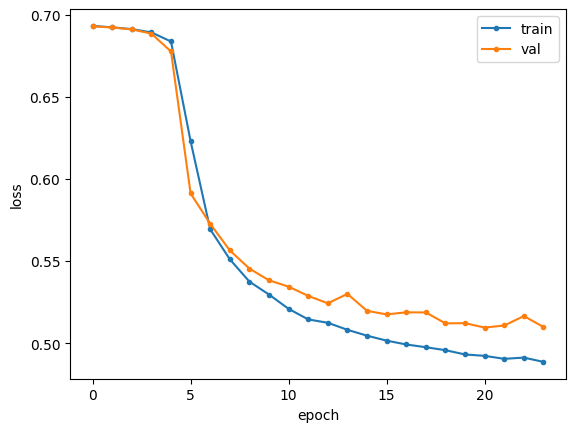

In [135]:
model = imdb_model([keras.layers.GRU(10, input_shape=(150,300), return_sequences=True),
                   keras.layers.GRU(10)])
imdb_test(model)